##### Banking Analytics Assignment

##### Introduction
This case study aims to give you an idea of applying data analytics in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


###### IMPORTING ALL THE REQUIRED PACKAGES 

In [1]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

###Reading the Application data
 
app_data = pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
### Checking the size of the datadet

app_data.shape

(307511, 122)

Rows--307511  and colums---122 present in the application dataset

In [3]:
##To display maximum columns

pd.set_option('display.max_columns',None),app_data.head()

(None,
    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
 0      100002       1         Cash loans           M            N   
 1      100003       0         Cash loans           F            N   
 2      100004       0    Revolving loans           M            Y   
 3      100006       0         Cash loans           F            N   
 4      100007       0         Cash loans           M            N   
 
   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
 0               Y             0          202500.0    406597.5      24700.5   
 1               N             0          270000.0   1293502.5      35698.5   
 2               Y             0           67500.0    135000.0       6750.0   
 3               Y             0          135000.0    312682.5      29686.5   
 4               Y             0          121500.0    513000.0      21865.5   
 
    AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
 0         351000.0   Unaccompanied    

In [4]:
###Checking the columns present in dataset

app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
## setting the index 'SK_ID_CURR'

app_data.set_index('SK_ID_CURR',inplace=True) 

In [6]:
app_data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.14921

##### A descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information.
The interquartile mean is a specific example of a truncated mean. It is simply the arithmetic mean after removing the lowest and the highest quarter of values.
In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.
For the data in this table the interquartile range is IQR = Q3 − Q1.The IQR is used to build box plots, simple graphical representations of a probability distribution.The median is the corresponding measure of central tendency.

The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set. It is also known as the lower or 25th empirical quartile, as 25% of the data is below this point.

The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.

The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point

Q1-splits off the lowest 25% of data from the highest 75%

Q2-cuts data set in half

Q3-splits off the highest 25% of data from the lowest 75%

In [8]:
app_data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [9]:
## To check all the columns  

app_data.columns[:30]

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT'],
      dtype='object')

In [10]:
app_data.columns[30:]

Index(['REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
 

In [11]:
### checking for the null values present in the dataset

round(100 * app_data.isnull().sum() / app_data.shape[0],2)

TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 121, dtype: float64

AMT_REQ_CREDIT_BUREAU_DAY ,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT ,AMT_REQ_CREDIT_BUREAU_YEAR having missing values.Rather than dropping these valuese we can impute the missing values using mean,median or fillna.Here I have used mean method to impute the missing values.

In [12]:
#filling null values in 'AMT_REQ_CREDIT_BUREAU_' columns with mean imputation method

app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(round(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(round(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mean()),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(round(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(round(app_data['AMT_REQ_CREDIT_BUREAU_MON'].mean()),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(round(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mean()),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(round(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()),inplace=True)

In [13]:
#Rechecking the null values are filled or not

round(100 * app_data.isnull().sum() / app_data.shape[0],2)

TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 121, dtype: float64

Inference:-All the missing values are filled using mean.

In [14]:
### checking the values in TARGET

app_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

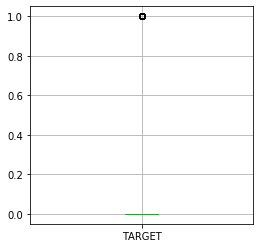

In [15]:
### Plotting the box plot of 'TARGET

app_data.boxplot(column='TARGET',figsize=(4,4))

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

Inference:- No Outliers present in the column TARGET.

In [16]:
### checking the values in NAME_CONTRACT_TYPE

app_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [17]:
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

The female count is 202448 and male count is 105059 .XNA representing null values.

In [18]:
app_data['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [19]:
app_data['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [20]:
app_data['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

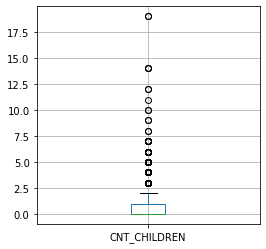

In [21]:
### Plotting the box plot of 'CNT_CHILDREN'

app_data.boxplot(column='CNT_CHILDREN',figsize=(4,4))

Few outliers in 'CNT_CHILDREN' but some people also adopt children and having more number of children increases the expenses of a person and hence decreases his ability to pay the loan. Hence we will not remove the outliers in this case.

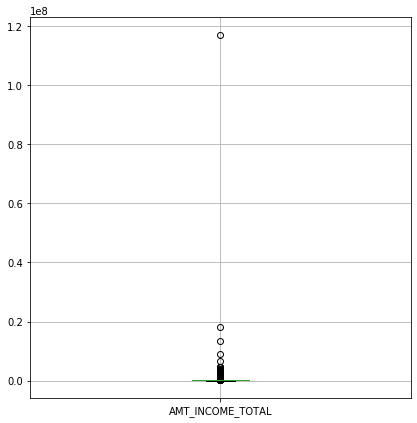

In [22]:
#Plotting boxplot for AMT_INCOME_TOTAL with and without log scale.

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
app_data.boxplot(column='AMT_INCOME_TOTAL')


In [23]:
### imputing outlier values using mean in AMT_INCOME_TOTAL

app_data['AMT_INCOME_TOTAL'].fillna(round(app_data['AMT_INCOME_TOTAL'].mean()),inplace=True)

In [24]:
#Checking what is the occupation type of the person with highest AMT_INCOME_TOTAL

app_data.loc[app_data['AMT_INCOME_TOTAL'] == app_data['AMT_INCOME_TOTAL'].max(), ['AMT_INCOME_TOTAL','OCCUPATION_TYPE']]

,AMT_INCOME_TOTAL,OCCUPATION_TYPE
SK_ID_CURR,,
114967,117000000.0,Laborers


Inference:-There are outliers in column 'AMT_INCOME_TOTAL'. We know that laborer cannot earn an income of 117 million. Hence it is invalid value/outlier. Therefore we will remove the rows in which these outliers are present. We will consider a value as outlier if the value is more than 3 Standard Deviation away from the median.

In [25]:
#Checking what is the occupation type of the person with lowest AMT_INCOME_TOTAL

app_data.loc[app_data['AMT_INCOME_TOTAL'] == app_data['AMT_INCOME_TOTAL'].min(), ['AMT_INCOME_TOTAL','OCCUPATION_TYPE']]

,AMT_INCOME_TOTAL,OCCUPATION_TYPE
SK_ID_CURR,,
101965,25650.0,Cleaning staff
124157,25650.0,NaN


Inference:-The lowest income for Cleaning staff.

In [26]:
from scipy import stats

#removing the rows which are more than 3 Standard Deviation away from the mean

app_data = app_data[np.abs(stats.zscore(app_data['AMT_INCOME_TOTAL']))<3]

#Checking the remaining largest values.

app_data['AMT_INCOME_TOTAL'].nlargest(5)

SK_ID_CURR
117927    877500.0
299668    877500.0
300374    877500.0
403717    876276.0
228135    864900.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [27]:
#As annuity is the periodic repayments made for the loan, it cannot be greater than the credit amount. Let's check.

print((app_data['AMT_ANNUITY']>app_data['AMT_CREDIT']).sum())

0


SK_ID_CURR
117337    4050000.0
120926    4050000.0
228135    4050000.0
240007    4050000.0
433294    4050000.0
Name: AMT_CREDIT, dtype: float64
SK_ID_CURR
120926    258025.5
118093    225000.0
123467    225000.0
127443    225000.0
137221    225000.0
Name: AMT_ANNUITY, dtype: float64


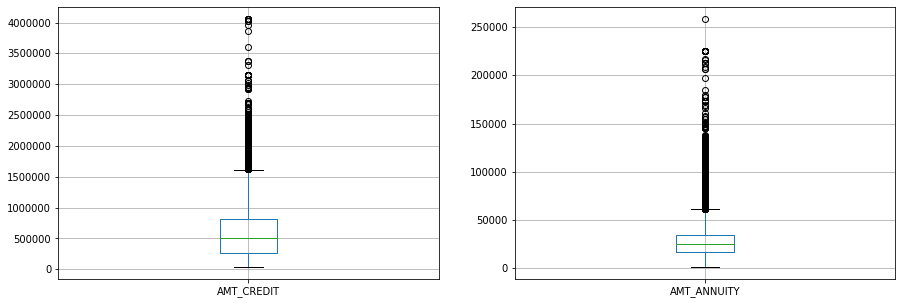

In [28]:
###check for invalid values/outliers in 'AMT_CREDIT' and 'AMT_ANNUITY'

plt.figure(figsize=(15,5))

#Plotting box plot for column AMT_CREDIT

print(app_data['AMT_CREDIT'].nlargest(5))
plt.subplot(1,2,1)
app_data.boxplot(column='AMT_CREDIT')

#Plotting box plot for column AMT_ANNUITY

print(app_data['AMT_ANNUITY'].nlargest(5))
plt.subplot(1,2,2)
app_data.boxplot(column='AMT_ANNUITY')

In [29]:

#Printing all the rows with outliers in AMT_CREDIT(values are more than 3 Standard Deviation away from the mean)

app_data.loc[np.abs(stats.zscore(app_data['AMT_CREDIT']))>3,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','OCCUPATION_TYPE']]


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,OCCUPATION_TYPE
SK_ID_CURR,,,,
100219,315000.0,2250000.0,83515.5,Core staff
100389,247500.0,1971072.0,68643.0,Core staff
100393,405000.0,2250000.0,59485.5,Core staff
100508,450000.0,1971072.0,62019.0,Managers
100559,450000.0,2286211.5,116266.5,Core staff
...,...,...,...,...
455785,135000.0,2013840.0,53253.0,NaN
455868,337500.0,1890000.0,71986.5,Accountants
455922,256500.0,2290743.0,60556.5,Managers


In [30]:
#Checking for the outliers present in DAYS_BIRTH and DAYS_EMPLOYED

app_data['DAYS_BIRTH'].nlargest(5)

app_data['DAYS_EMPLOYED'].nlargest(5)

SK_ID_CURR
100011    365243
100015    365243
100027    365243
100045    365243
100050    365243
Name: DAYS_EMPLOYED, dtype: int64

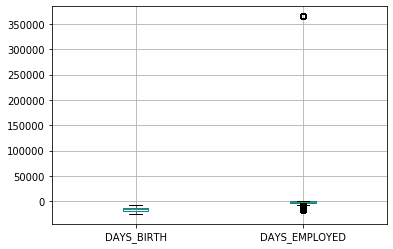

In [31]:

#Plotting a box plot to check outliers in DAYS_BIRTH and DAYS_EMPLOYED

app_data.boxplot(column=['DAYS_BIRTH','DAYS_EMPLOYED'])

There are some values in 'DAYS_EMPLOYED' column which are greater than 0

In [32]:
#Checking column NAME_INCOME_TYPE

app_data['NAME_INCOME_TYPE'].value_counts()


Working                 158632
Commercial associate     71352
Pensioner                55343
State servant            21678
Unemployed                  22
Student                     18
Businessman                  7
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [33]:
#Checking column NAME_EDUCATION_TYPE

app_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218280
Higher education                  74542
Incomplete higher                 10262
Lower secondary                    3811
Academic degree                     162
Name: NAME_EDUCATION_TYPE, dtype: int64

In [34]:
#Checking column NAME_FAMILY_STATUS

app_data['NAME_FAMILY_STATUS'].value_counts()

Married                 196121
Single / not married     45370
Civil marriage           29743
Separated                19741
Widow                    16080
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [35]:
#Checking column ORGANIZATION_TYPE

app_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67810
XNA                       55355
Self-employed             38361
Other                     16654
Medicine                  11182
Business Entity Type 2    10541
Government                10399
School                     8891
Trade: type 7              7817
Kindergarten               6879
Construction               6706
Business Entity Type 1     5971
Transport: type 4          5392
Trade: type 3              3488
Industry: type 9           3362
Industry: type 3           3276
Security                   3244
Housing                    2957
Industry: type 11          2698
Military                   2631
Bank                       2487
Agriculture                2452
Police                     2339
Transport: type 2          2203
Postal                     2155
Security Ministries        1971
Trade: type 2              1894
Restaurant                 1808
Services                   1573
University                 1323
Industry: type 7           1306
Transpor

In [36]:
app_data['ORGANIZATION_TYPE'].nunique()

58

Inference:-58 number of distinct observations present in the organization type.

XNA values is present in the orgnization type.XNA is null values


In [37]:
app_data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272451
With parents            14825
Municipal apartment     11171
Rented apartment         4876
Office apartment         2613
Co-op apartment          1121
Name: NAME_HOUSING_TYPE, dtype: int64

Inference:- 6 number of distinct observations present in the NAME_HOUSING_TYPE

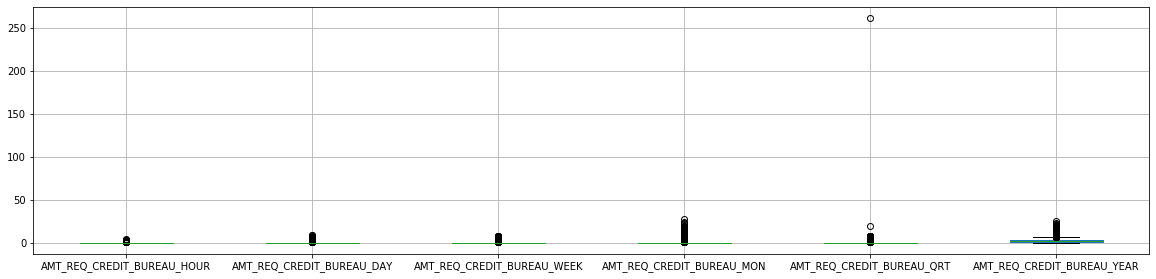

In [38]:
#Plotting box plot for all the AMT_REQ_CREDIT_BUREAU_(HOUR,DAY,WEEK,MONTH,QUARTER,EAR)columns

plt.figure(figsize=(20,10))
plt.subplot(2,1,2)
app_data.boxplot(column=['AMT_REQ_CREDIT_BUREAU_HOUR',
                        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                        'AMT_REQ_CREDIT_BUREAU_YEAR'])


'AMT_REQ_CREDIT_BUREAU_QRT' has one outlier.

###### Univariate Analysis

In [39]:
app_target0 = app_data.loc[app_data['TARGET'] == 0]
app_target1 = app_data.loc[app_data['TARGET'] == 1]

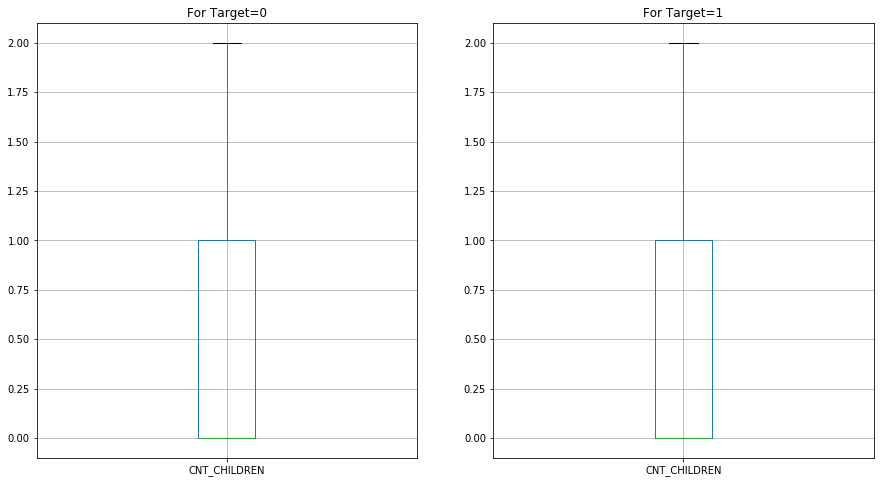

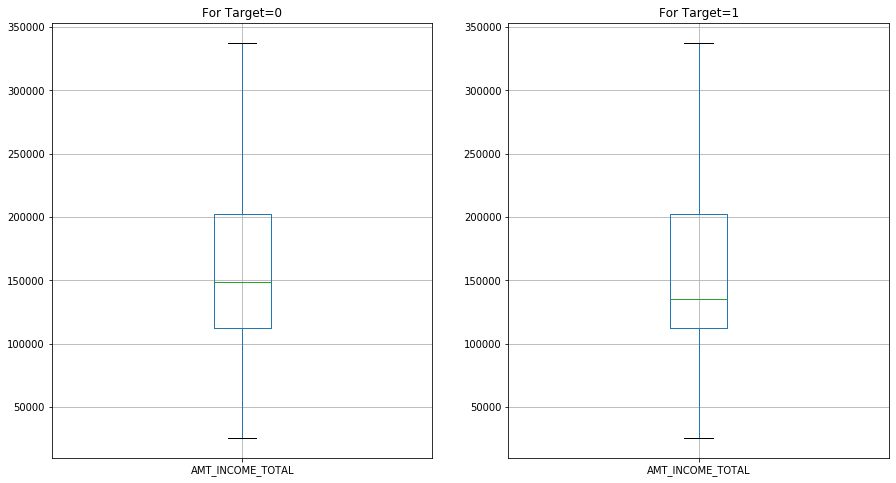

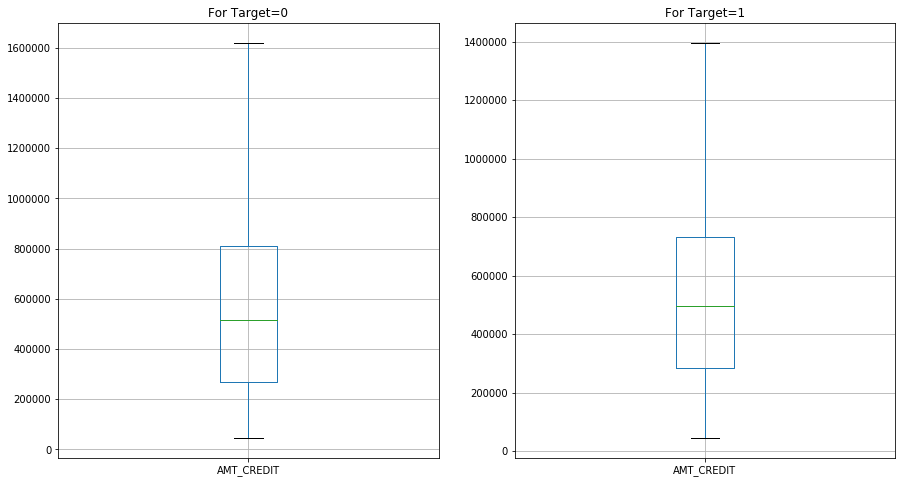

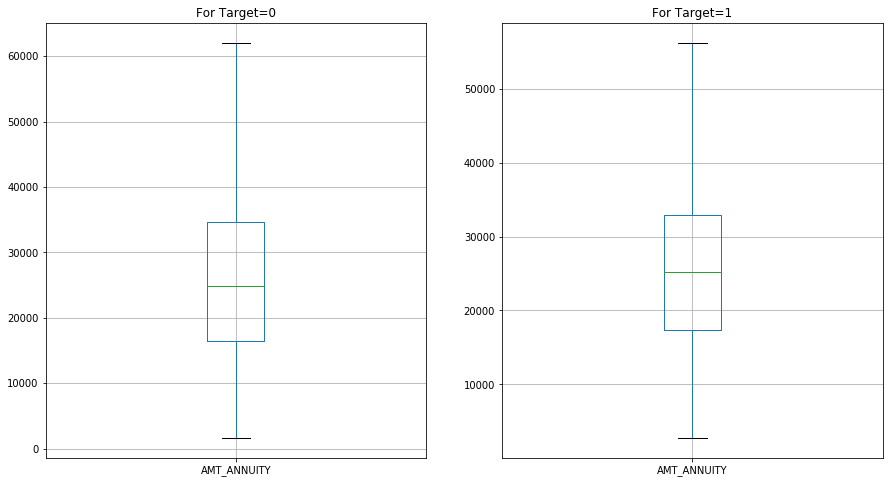

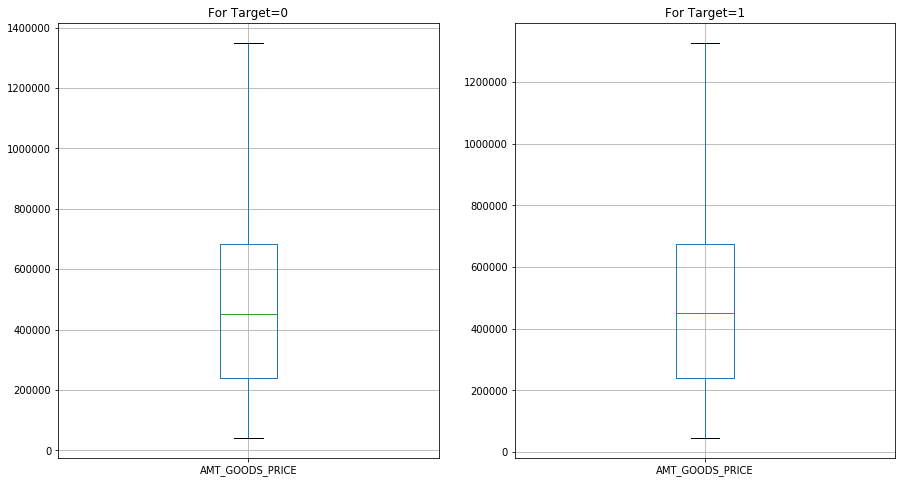

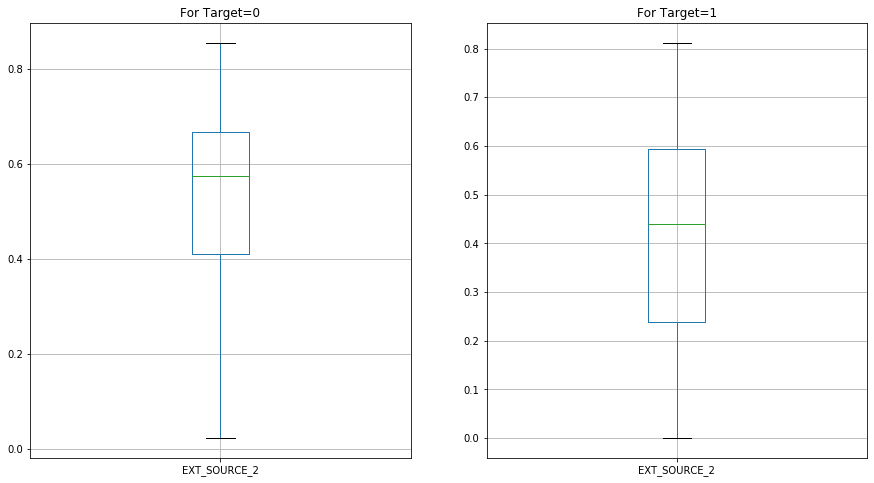

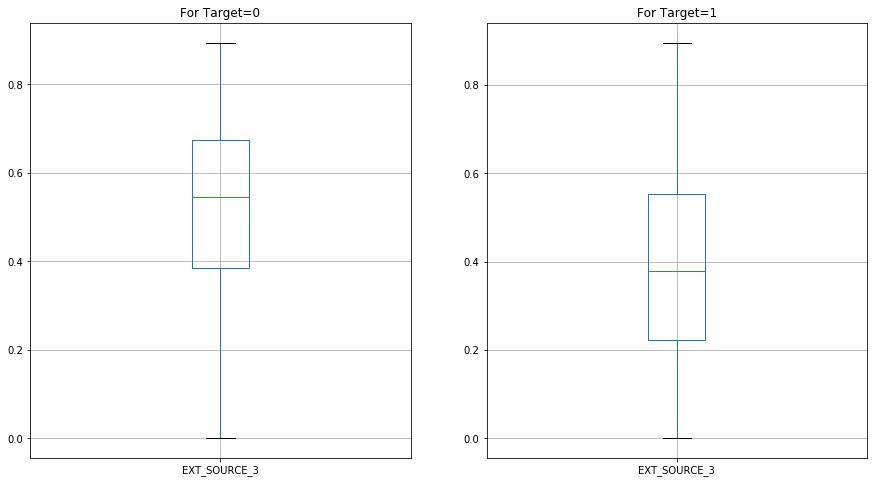

In [40]:
#creating a listfor the numerical columns 

col = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','EXT_SOURCE_2',
       'EXT_SOURCE_3']

#plotting the boxplots of numerical variables.

#Left side boxplot for variables of Target=0 and Right boxplot for variables of Target=1
### Target=0 are the non defaulters and Target=1 are the defaulters

for i in col:
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    app_target0.boxplot(column=i,showfliers=False)
    plt.title('For Target=0')
    plt.subplot(1,2,2)
    app_target1.boxplot(column=i,showfliers=False)
    plt.title('For Target=1')


Text(0.5, 1.0, 'NAME_EDUCATION_TYPE for Target=1')

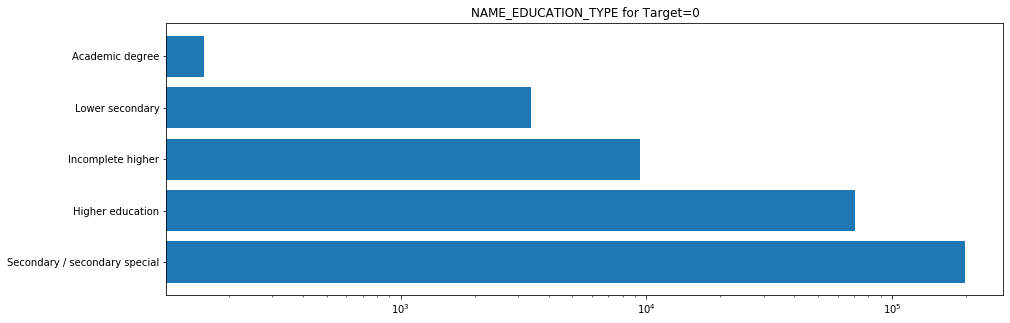

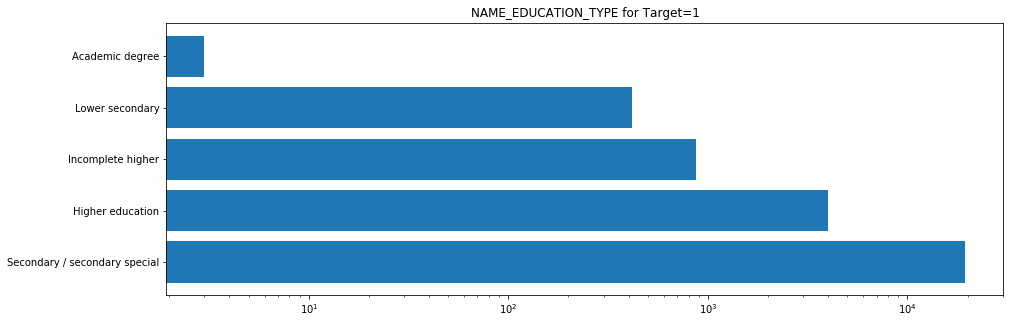

In [41]:
#Plotting a bar graph for NAME_EDUCATION_TYPE column

plt.figure(figsize=(15,5))
plt.barh(y = app_target0['NAME_EDUCATION_TYPE'].value_counts().index,width=app_target0['NAME_EDUCATION_TYPE'].value_counts())
plt.xscale('log')
plt.title('NAME_EDUCATION_TYPE for Target=0')

plt.figure(figsize=(15,5))
plt.barh(y = app_target1['NAME_EDUCATION_TYPE'].value_counts().index,width=app_target1['NAME_EDUCATION_TYPE'].value_counts())
plt.xscale('log')
plt.title('NAME_EDUCATION_TYPE for Target=1')

Inference:-Above the bar graph showing the highest defaulters is Secondary and higher education.

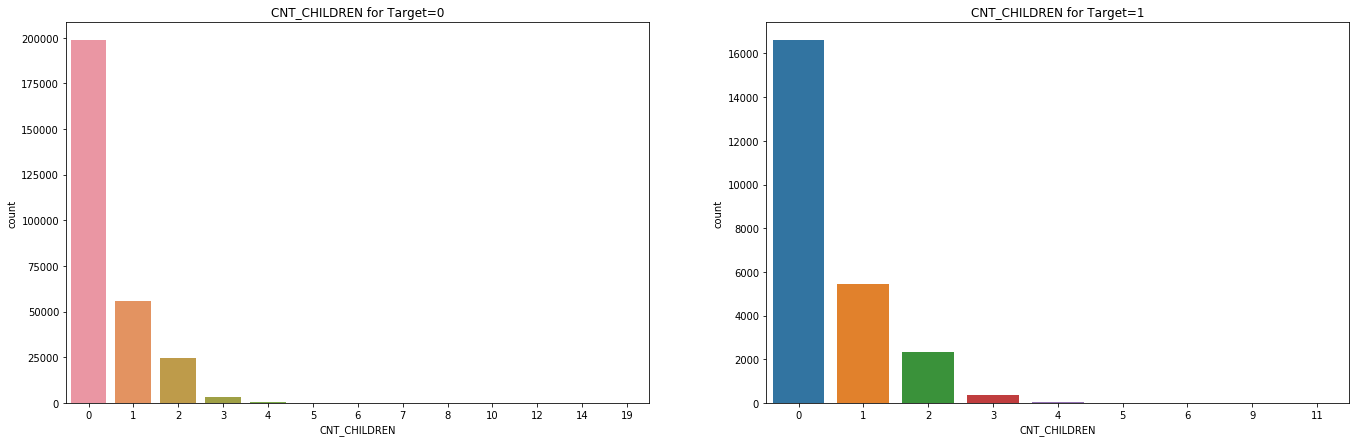

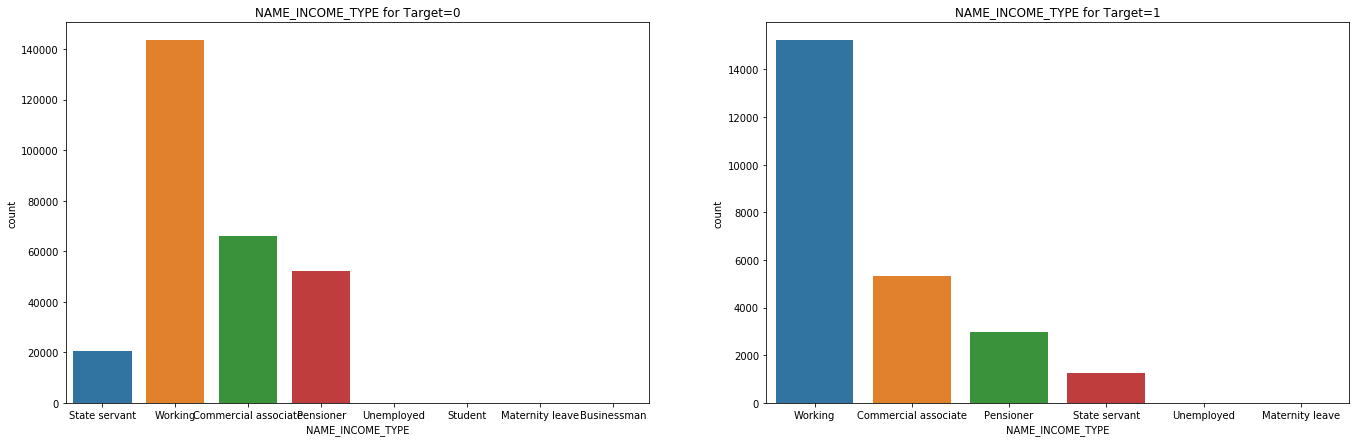

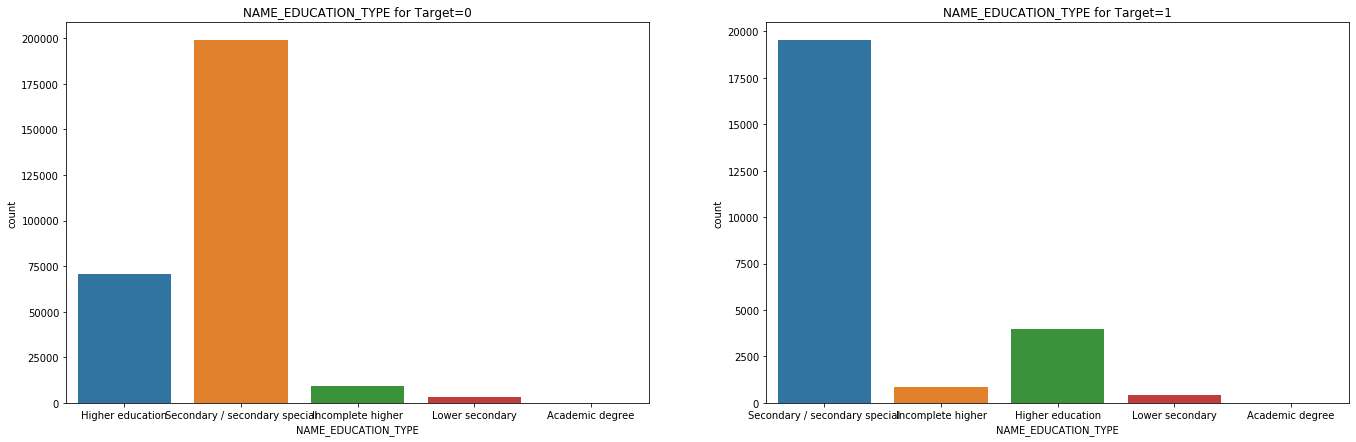

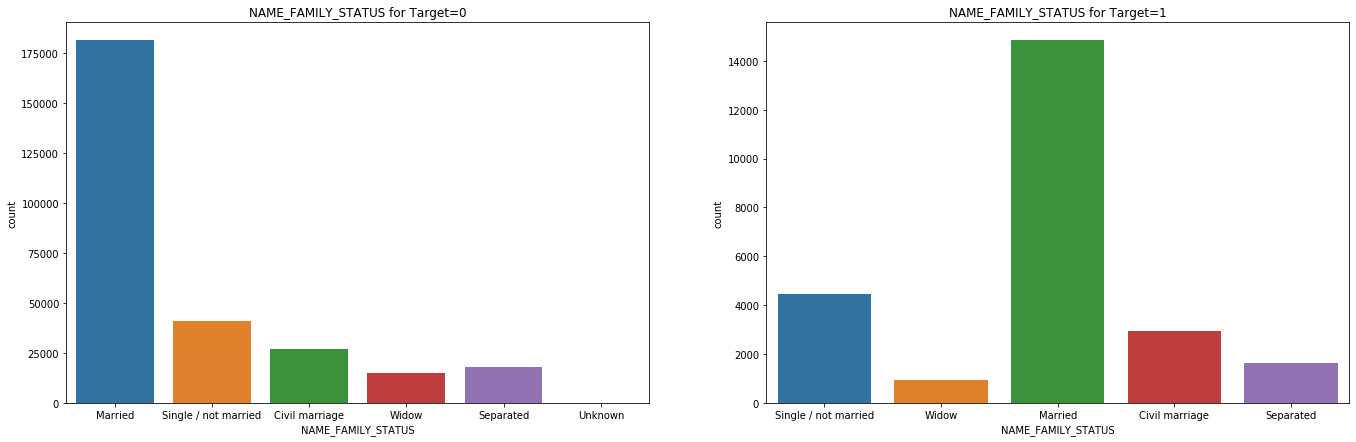

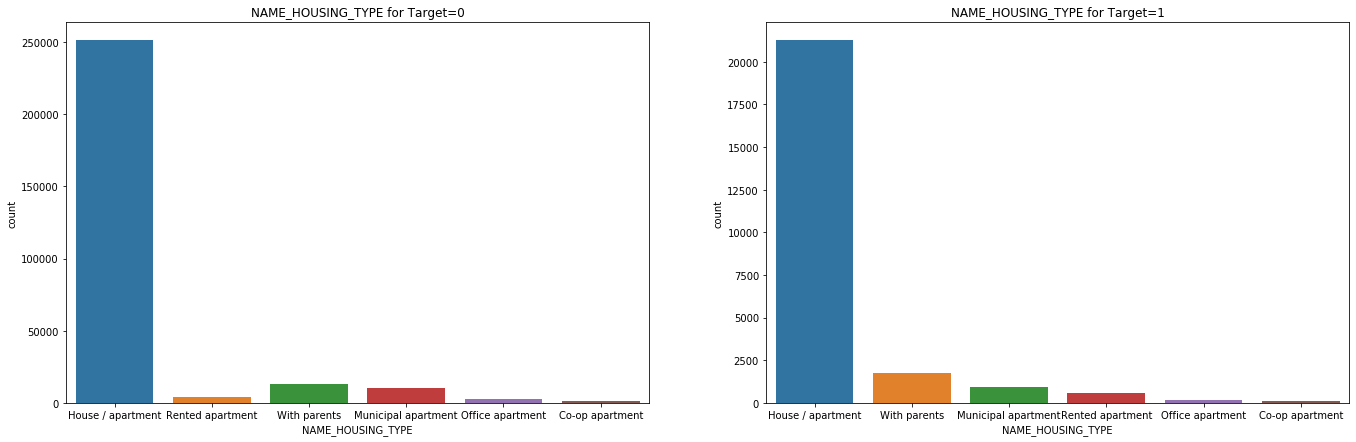

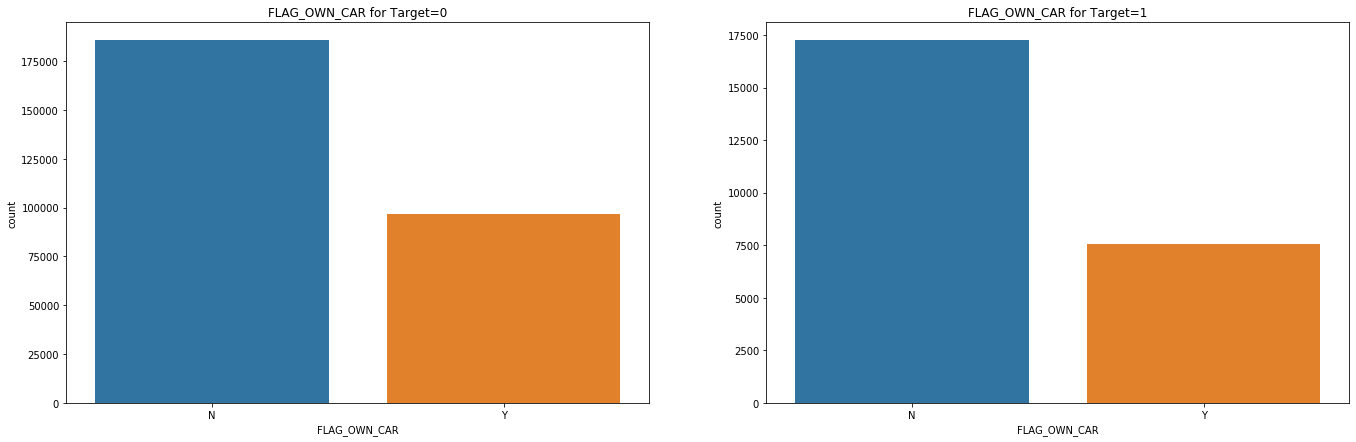

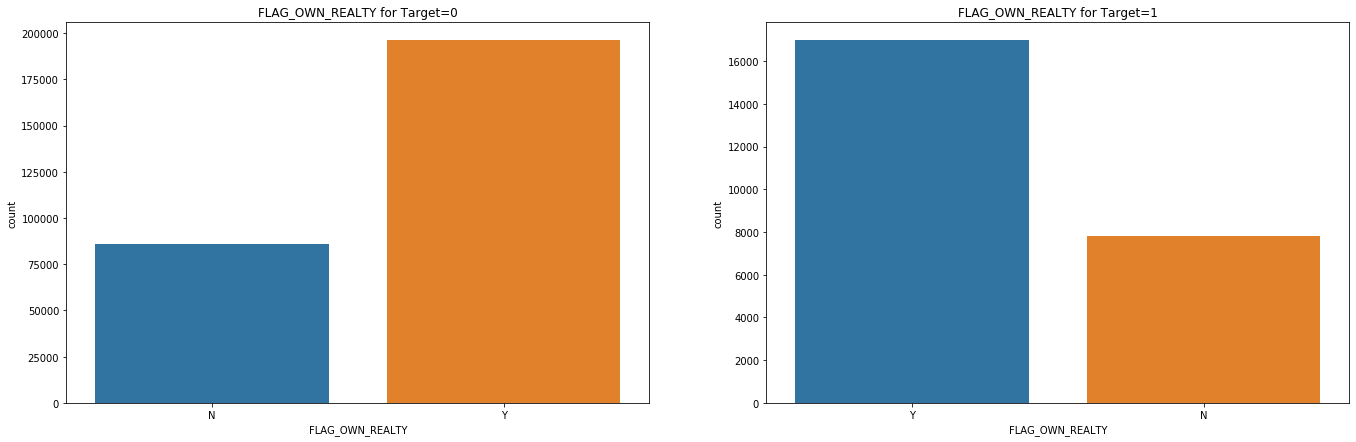

In [42]:

cols = ['CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY']
for i in cols:
    plt.figure(figsize=(23,7))
    plt.subplot(1,2,1)
    sns.countplot(x=i,data=app_target0)
    plt.title(i+' for Target=0')
    plt.subplot(1,2,2)
    sns.countplot(x=i,data=app_target1)
    plt.title(i+' for Target=1')

Inference:- In ('NAME_INCOME_TYPE')defaulters includes working ,commercial associates and pensioners.
    
In('NAME_EDUCATION_TYPE')the highest defaulters are secondary educated annd Higher educated persons.
        
 In('NAME_FAMILY_STATUS')The highest defaulters is married family non defaulters also married family.Below 50000 the single/not married defaulters and nearly 4000 are defaulters.
            
In('NAME_HOUSING_TYPE')both defaulters and non defaulters are living in house /aparments.
        
In('FLAG_OWN_CAR')The number of most people applying for loan do not own a car and the ratio of people who own a car is higher for non-defaulters.

In('FLAG_OWN_REALITY')The number of most people applying for loan defaulters is 200000.           
              
    
       
    

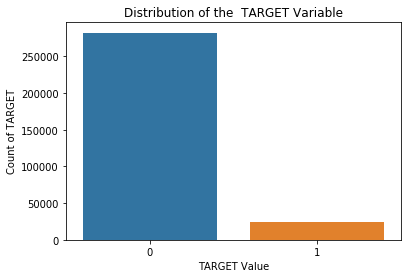

In [43]:
### Checking the  Distribution of Target Variable.--->defaulters==1 & Non defaulter==0

sns.countplot(app_data.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of the  TARGET Variable")
plt.show()

From the above graph,More than 25000 loans were repaid, Less than 5000 loans were not repaid.

In [44]:
print("The Percentage of people who have paid their loan is:",round(app_target0,2),"%")

print("The Percentage of people who have NOT paid their loan is:",round(app_target1,2),"%")

The Percentage of people who have paid their loan is:             TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100003           0         Cash loans           F            N   
100004           0    Revolving loans           M            Y   
100006           0         Cash loans           F            N   
100007           0         Cash loans           M            N   
100008           0         Cash loans           M            N   
...            ...                ...         ...          ...   
456249           0         Cash loans           F            N   
456251           0         Cash loans           M            N   
456252           0         Cash loans           F            N   
456253           0         Cash loans           F            N   
456255           0         Cash loans           F            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR   

The Percentage of people who have NOT paid their loan is:             TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           1         Cash loans           M            N   
100031           1         Cash loans           F            N   
100047           1         Cash loans           M            N   
100049           1         Cash loans           F            N   
100096           1         Cash loans           F            N   
...            ...                ...         ...          ...   
456186           1         Cash loans           M            N   
456215           1         Cash loans           F            N   
456225           1         Cash loans           M            N   
456233           1         Cash loans           F            N   
456254           1         Cash loans           F            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CUR

#### The above step showing the percentage of tagert=0 and target=1 for all columns

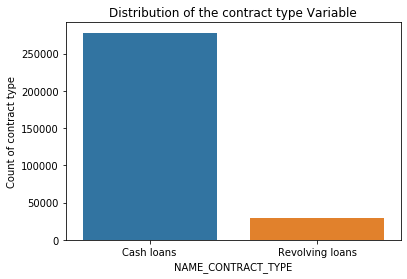

In [45]:
### checking for "NAME_CONTRACT_TYPE"

sns.countplot(app_data.NAME_CONTRACT_TYPE)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Count of contract type")
plt.title("Distribution of the contract type Variable")
plt.show()

The number of Cash loans is much higher than the number of Revolving loans for both.Cash loans is more than 250000 and revolving cash loans is near to 5000.

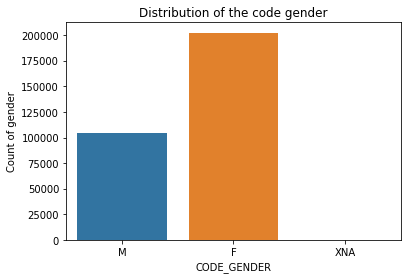

In [46]:
###  (non-defaulters)N---0,(defaulters)Y----1

sns.countplot(app_data.CODE_GENDER)
plt.xlabel("CODE_GENDER")
plt.ylabel("Count of gender")
plt.title("Distribution of the code gender")
plt.show()

From the above distribution of code gender  female is having more loan than male.
XNa representing the null values.

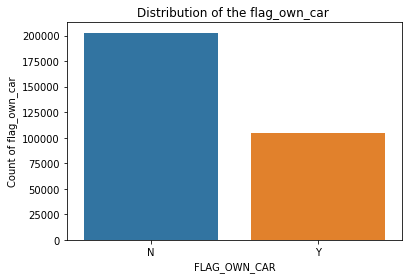

In [47]:
###  (non-defaulters)N---0,(defaulters)Y----1

sns.countplot(app_data.FLAG_OWN_CAR)
plt.xlabel("FLAG_OWN_CAR")
plt.ylabel("Count of flag_own_car")
plt.title("Distribution of the flag_own_car ")
plt.show()

Inference:-The number of most people applying for loan do not own a car and the ratio of people who own a car is higher for non-defaulters

Text(0.5, 1.0, 'ORGANIZATION_TYPE for Target=1')

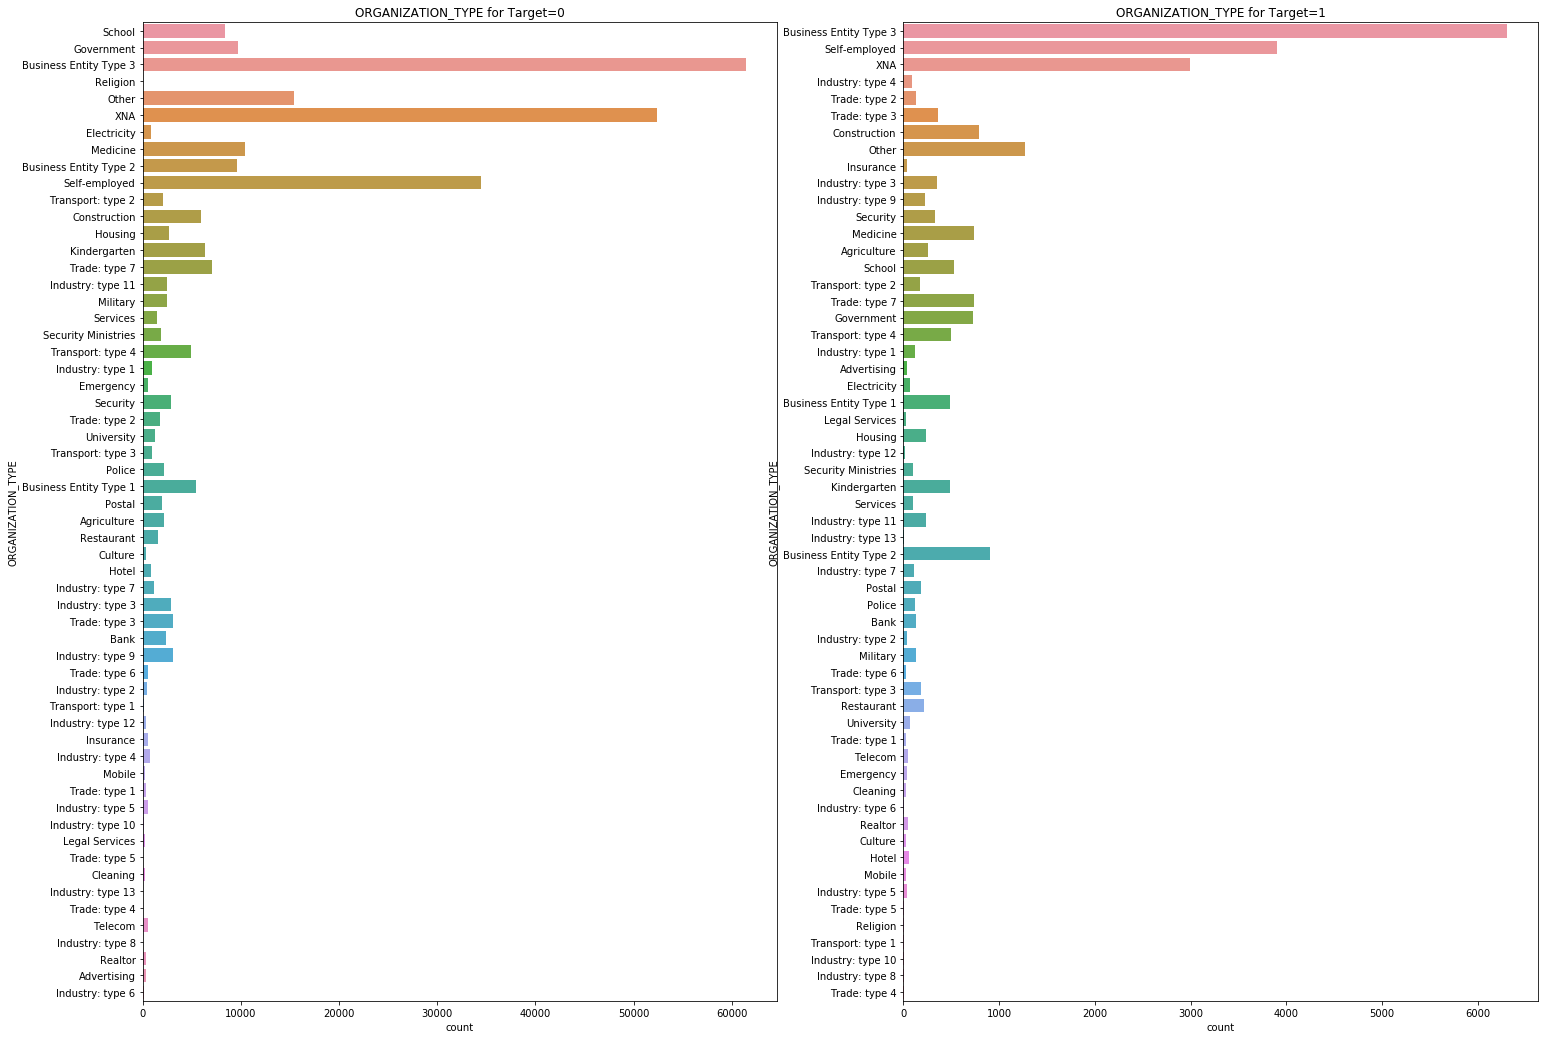

In [48]:
#Plotting a countplot for Organization_Type column

plt.figure(figsize=(25,18))
plt.subplot(1,2,1)
sns.countplot(y='ORGANIZATION_TYPE',data=app_target0)
plt.title('ORGANIZATION_TYPE for Target=0')
plt.subplot(1,2,2)
sns.countplot(y='ORGANIZATION_TYPE',data=app_target1)
plt.title('ORGANIZATION_TYPE for Target=1')


Majority of the defaulters are from Organization type 'Business_Entity_3' ,'Self Employed','Medicines' and 'Business_Entity_3'.

Text(0.5, 1.0, 'OCCUPATION_TYPE for Target=1')

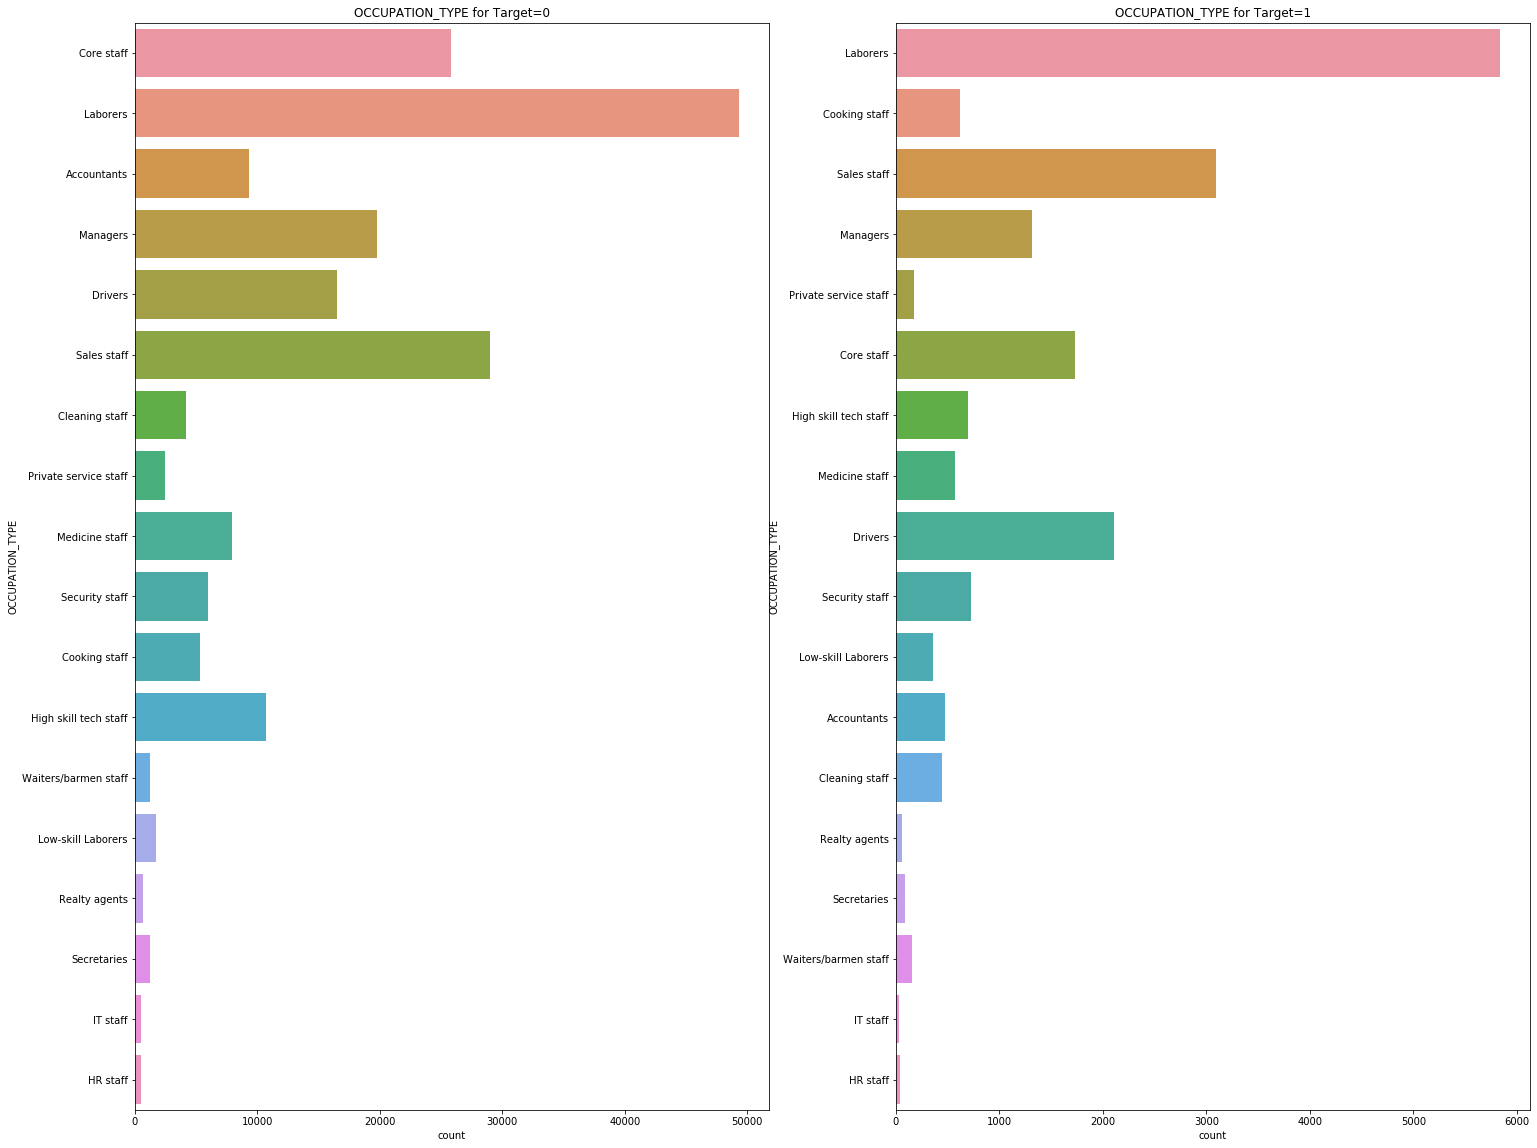

In [49]:
#Plotting a countplot for OCCUPATION_TYPE column


plt.figure(figsize=(25,20))
plt.subplot(1,2,1)
sns.countplot(y='OCCUPATION_TYPE',data=app_target0)
plt.title('OCCUPATION_TYPE for Target=0')
plt.subplot(1,2,2)
sns.countplot(y='OCCUPATION_TYPE',data=app_target1)
plt.title('OCCUPATION_TYPE for Target=1')

From the above plots, we can infer that, Majority of defaulters,

Don't own a car,

Own a real estate property,

Have 0 or 1 children,

Their income type is 'Working',

Have secondary education,

Are married,

Live in a House or apartment,

Are from the Organization_type Business_Entity_3 and Self Employed,

Are from Occupation_type Laborers, Sales Staff and Drivers.

In [50]:
df=app_data[(app_data.AMT_INCOME_TOTAL>1.687979e+05) & (app_data.AMT_INCOME_TOTAL<1.170000e+08)]
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,17.0,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.774761,0.724000

<function matplotlib.pyplot.show(*args, **kw)>

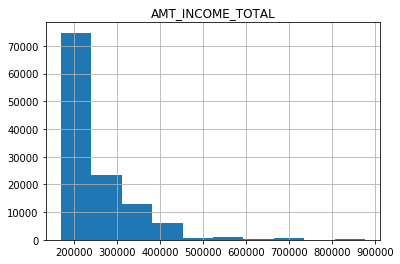

In [51]:
### checking the distribution of AMT_INCOME_TOTAL

df.hist(column='AMT_INCOME_TOTAL')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

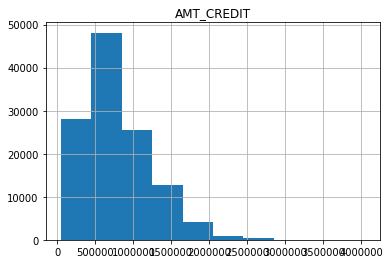

In [52]:
### checking the distribution of AMT_CREDIT

df.hist(column='AMT_CREDIT')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

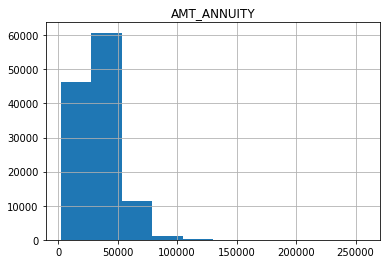

In [53]:
### checking the distribution of AMT_ANNUITY

df.hist(column='AMT_ANNUITY')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

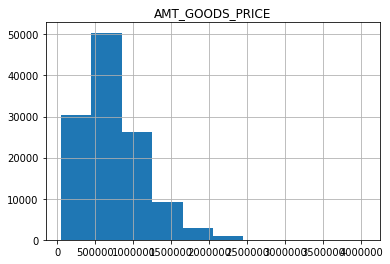

In [54]:
### checking the distribution of AMT_GOODS_PRICE

df.hist(column='AMT_GOODS_PRICE')
plt.show

### Bi variate Analysis-Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them



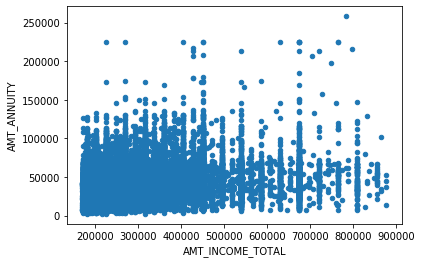

In [55]:
df.plot.scatter(x='AMT_INCOME_TOTAL',y='AMT_ANNUITY')
plt.show()

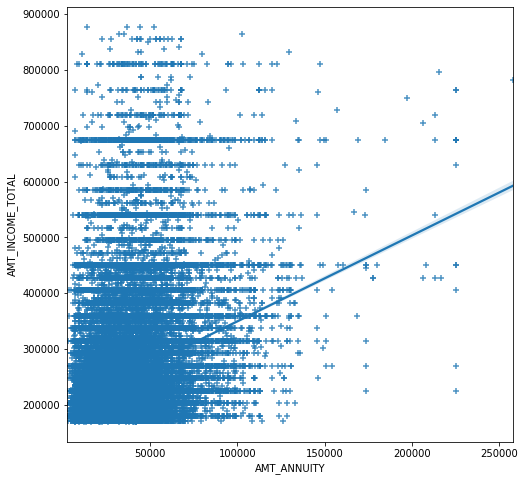

In [56]:
x,y = df['AMT_ANNUITY'],df['AMT_INCOME_TOTAL']
plt.figure(figsize=(8,8))
sns.regplot(x=x, y=y, marker='+')

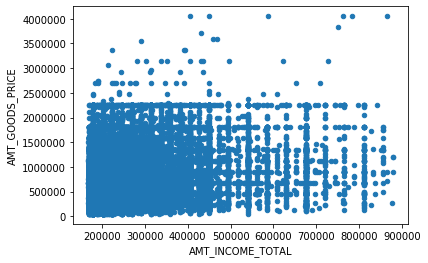

In [57]:
df.plot.scatter(x='AMT_INCOME_TOTAL',y='AMT_GOODS_PRICE')
plt.show()

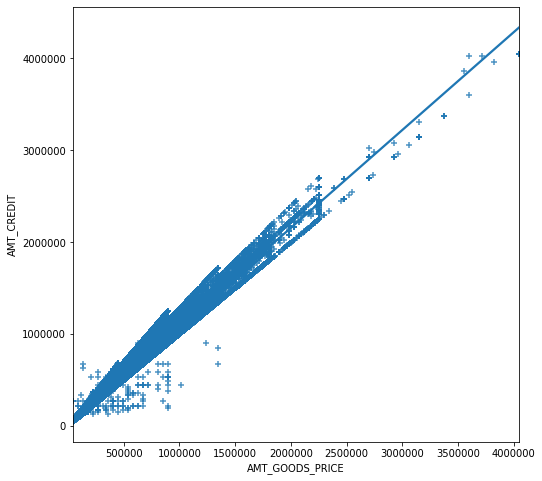

In [59]:
x,y = df['AMT_GOODS_PRICE'],df['AMT_CREDIT']
plt.figure(figsize=(8,8))
sns.regplot(x=x, y=y, marker='+')

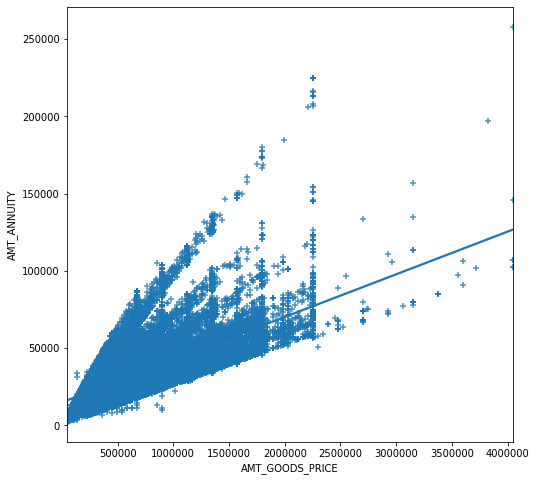

In [60]:
x,y = df['AMT_GOODS_PRICE'],df['AMT_ANNUITY']
plt.figure(figsize=(8,8))
sns.regplot(x=x, y=y, marker='+')

In [61]:
corr_app=df.corr()
corr_app

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
TARGET,1.000000,0.010019,-0.029338,-0.048526,-0.032881,-0.058385,-0.048437,0.054271,-0.027779,0.031560,0.037932,0.036073,NaN,0.029047,0.016881,0.003160,-0.024956,0.000434,0.001334,0.062383,0.065273,-0.024846,0.005880,0.008729,0.005135,0.037146,0.045418,0.029590,-0.150826,-0.161766,-0.170667,-0.034045,-0.025433,-0.009388,-0.026015,-0.018709,-0.039997,-0.019584,-0.048633,-0.040191,-0.008202,-0.029803,-0.036644,-0.000912,-0.014563,-0.031286,-0.021396,-0.008585,-0.026697,-0.015796,-0.037496,-0.017987,-0.047702,-0.039316,-0.007316,-0.027247,-0.033515,0.001319,-0.012943,-0.033983,-0.024624,-0.009485,-0.026650,-0.018848,-0.039766,-0.019547,-0.048393,-0.040344,-0.008633,-0.029311,-0.036415,-0.000516,-0.014439,-0.037112,0.014040,0.030690,0.013992,0.029232,0.044884,0.006619,0.046600,-0.002458,-0.001638,-0.020075,-0.003664,-0.012789,-0.003756,-0.001638,-0.005463,-0.001159,-0.014952,-0.011659,-0.008650,-0.010506,-0.005182,-0.012164,-0.002625,-0.000184,0.005088,0.002023,-0.001119,-0.001384,-0.014958,-0.004383,0.023879,-0.054271
CNT_CHILDREN,0.010019,1.000000,0.021311,-0.015007,0.002529,-0.019786,-0.029868,0.288826,-0.183538,0.157453,-0.064468,0.017526,NaN,0.184520,0.009728,-0.002367,-0.031283,0.017916,0.883117,0.030028,0.028313,-0.025665,-0.018704,0.004649,0.013188,0.016774,0.049492,0.050192,-0.131235,-0.018815,-0.020064,-0.008921,-0.002066,0.008724,0.035836,0.001518,-0.005284,-0.002556,-0.005856,-0.008265,0.008727,-0.003866,-0.003578,0.002004,0.002165,-0.006499,-0.001618,0.006211,0.034599,0.001881,-0.003708,0.000056,-0.005444,-0.007654,0.009643,-0.002285,-0.000846,0.002823,0.003524,-0.008323,-0.002876,0.007988,0.035637,0.001844,-0.004976,-0.002547,-0.005603,-0.008019,0.009363,-0.003097,-0.003216,0.002416,0.002374,-0.001666,0.003601,-0.004452,0.003371,-0.001937,-0.004252,-0.002446,0.015032,-0.005189,-0.022619,-0.118182,-0.004193,0.062544,-0.009110,-0.003459,-0.003280,0.000354,0.004642,-0.005944,0.003933,0.013558,-0.002799,0.000884,0.001100,0.001366,-0.002784,0.001452,0.000434,-0.003558,-0.009758,-0.003969,-0.050059,-0.288826
AMT_INCOME_TOTAL,-0.029338,0.021311,1.000

###### Plotting a heat map with correlation values across various numerical variables Both Target=0 & Target =1

In [62]:
#Creating the correlation matrix using the corr() method for target=0

corr_target0 = app_target0[['FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
            'AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3']].corr()

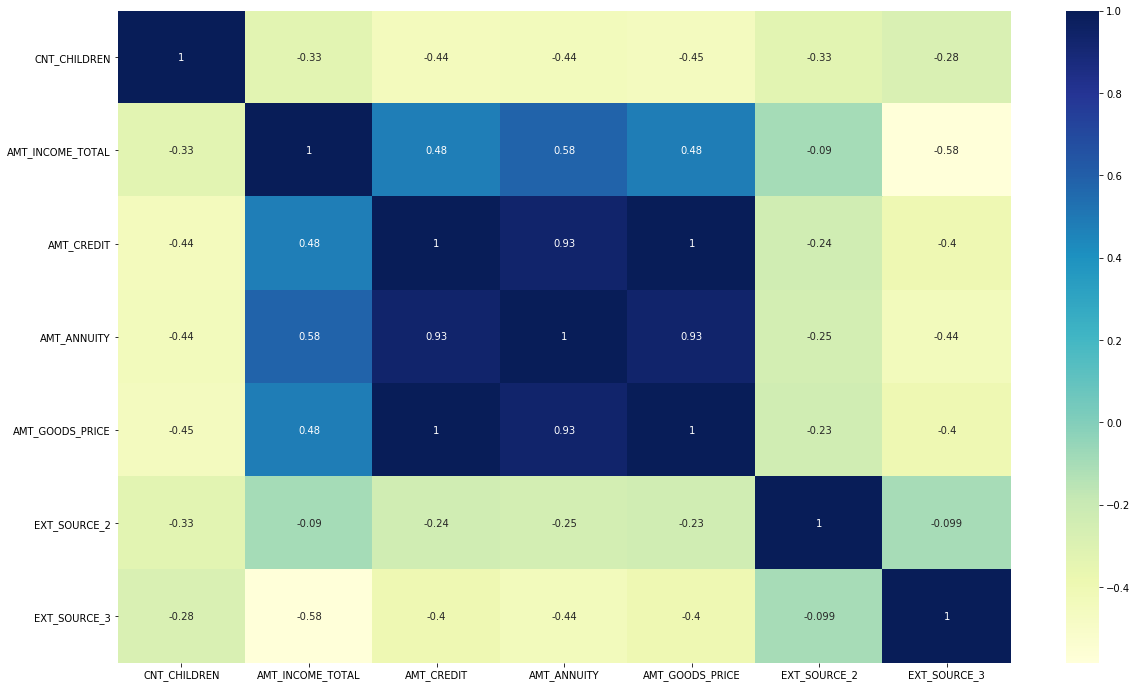

In [63]:
plt.figure(figsize=(20,12))
sns.heatmap(corr_target0 .corr(),cmap='YlGnBu',annot=True);

In [64]:
corr_target1 = app_target1[['FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
            'AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3']].corr()

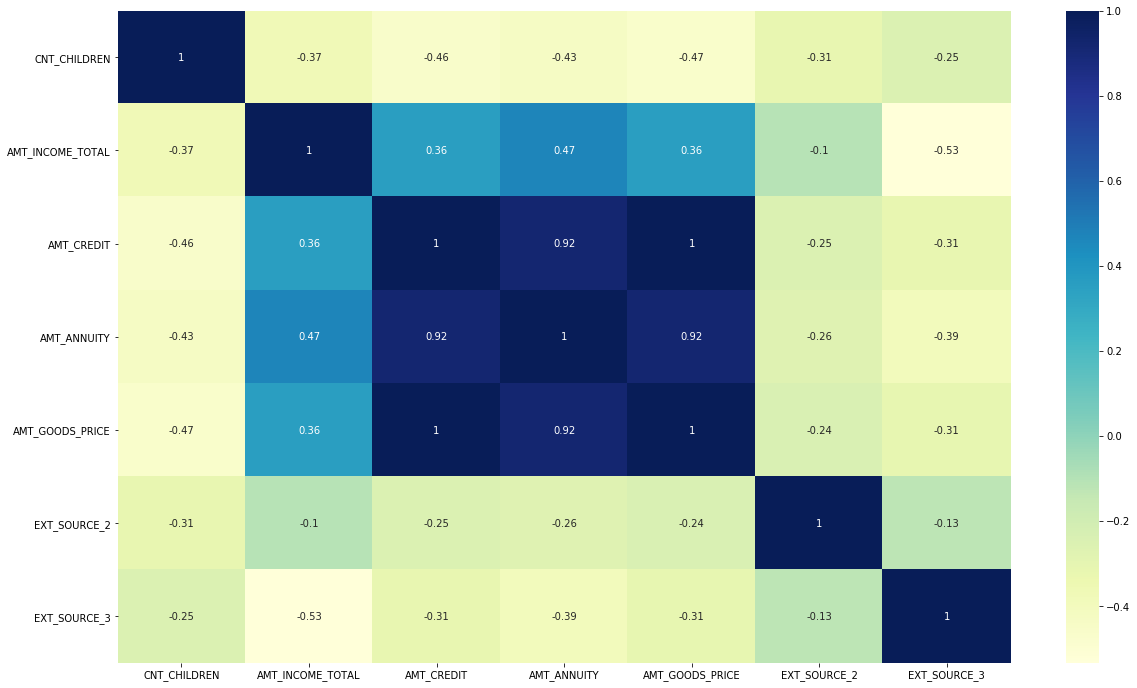

In [65]:
plt.figure(figsize=(20,12))
sns.heatmap(corr_target1 .corr(),cmap='YlGnBu',annot=True);

Correlation is a statistical measure that expresses the extent to which two variables are linearly related.

Inference:-        
                     Correlations                       Target=0           Target=1
    
    
                1. AMT_GOODS_PRICE and AMT_CREDIT         1                 1       ---------HIGH POSITIVE CORRELATION
        
                2.AMT_ANNUITY and AMT_GOOD_PRICE         0.93               0.92     ---------HIGH POSITIVE CORRELATION
            
                3.EXT_SOURCE_2 and AMT_INCOME_TOTAL     -0.33            -0.53       ---------LESS NEGATIVE CORRELATION

##### Analysis:-The defaulters includes working ,commercial associates and pensioners.

The highest defaulters are secondary educated annd Higher educated persons.

The highest defaulters is married family non defaulters also married family.Below 50000 the single/not married defaulters and nearly 4000 are defaulters.

Both defaulters and non defaulters are living in house /aparments.

The number of most people applying for loan do not own a car and the ratio of people who own a car is higher for non-defaulters.

Are from Occupation_type Laborers, Sales Staff and Drivers.

Majority of the defaulters are from Organization type 'Business_Entity_3' ,'Self Employed','Medicines' and 'Business_Entity_3'.

Highest correlation for MT_GOODS_PRICE and AMT_CREDIT,correlation value 1(positive correlation) .Next for AMT_ANNUITY and 

AMT_GOOD_PRICE (0.932 & 0.93) also high correlation in positive direction.EXT_SOURCE_2 and AMT_INCOME_TOTAL having negative correlation.

###### Conclusion:-

Married people are most likely to default on their loans.

Majority of the defaulters are from Organization type 'Business_Entity_3' ,'Self Employed','Medicines' and 'Business_Entity_3'.
.

###### 

###### 

###### Importing the 'previous_application.csv

In [71]:
prev_data = pd.read_csv('previous_application.csv')
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
prev_data.shape

(1670214, 37)

In [73]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [74]:
pd.set_option('display.max_columns',None),prev_data.head()

(None,
    SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
 0     2030495      271877     Consumer loans     1730.430          17145.0   
 1     2802425      108129         Cash loans    25188.615         607500.0   
 2     2523466      122040         Cash loans    15060.735         112500.0   
 3     2819243      176158         Cash loans    47041.335         450000.0   
 4     1784265      202054         Cash loans    31924.395         337500.0   
 
    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
 0     17145.0               0.0          17145.0                   SATURDAY   
 1    679671.0               NaN         607500.0                   THURSDAY   
 2    136444.5               NaN         112500.0                    TUESDAY   
 3    470790.0               NaN         450000.0                     MONDAY   
 4    404055.0               NaN         337500.0                   THURSDAY   
 
    HOUR_APPR_PROCESS_START FLAG_LA

In [75]:
## setting the index

prev_data.set_index('SK_ID_PREV',inplace=True) 

In [76]:
prev_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [77]:
prev_data.describe()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [78]:
prev_data['AMT_ANNUITY'].value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
30073.860        1
41845.365        1
36622.620        1
41864.760        1
63715.905        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

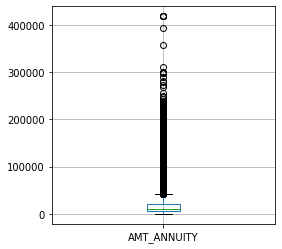

In [79]:
### Plotting the box plot of 'AMT_ANNUITY

prev_data.boxplot(column='AMT_ANNUITY',figsize=(4,4))

Outliers are present in the AMT_ANNUITY

In [80]:
prev_data['AMT_APPLICATION'].value_counts()

0.000         392402
45000.000      47831
225000.000     43543
135000.000     40678
450000.000     38905
               ...  
355626.000         1
247404.465         1
355594.500         1
355590.000         1
442350.000         1
Name: AMT_APPLICATION, Length: 93885, dtype: int64

In [81]:
prev_data['AMT_APPLICATION'].nunique()

93885

In [82]:
prev_data['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [116]:
prev_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

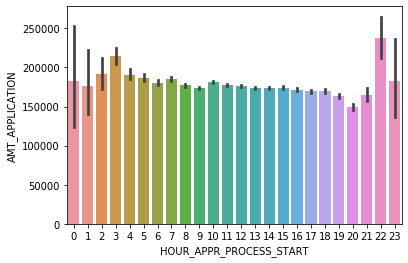

In [83]:
ax = sns.barplot(x="HOUR_APPR_PROCESS_START", y="AMT_APPLICATION", data=prev_data)

Inference:-The application processing start at 22nd hour.

In [84]:
df1=prev_data[(prev_data.AMT_ANNUITY>1.595512e+04) & (prev_data.AMT_ANNUITY<4.180581e+05)]
df1

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
1232483,151612,Consumer loans,21307.455,126490.5,119853.0,12649.5,126490.5,TUESDAY,7,Y,1,0.103971,NaN,NaN,XAP,Approved,-699,Cash through the bank,XAP,Unaccompanied,New,Auto Accessories,POS,XNA,Regional / Local,130,Industry,6.0,low_normal,POS other with interest,365243.0,-668.0,-518.0,-518.0,-512.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407146,198989,Cash loans,36598.095,450000.0,570073.5,NaN,450000.0,THURSDAY,12,Y,1,NaN,NaN,NaN,XNA,Refused,-848,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,100,XNA,24.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
2459206,238591,Cash loans,19401.435,180000.0,243936.0,0.0,180000.0,TUESDAY,13,Y,1,0.000000,NaN,NaN,Purchase of electronic equipment,Approved,-1833,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,100,XNA,24.0,high,Cash Street: high,365243.0,-1802.0,-1112.0,-1112.0,-1100.0,0.0
1556789,209732,Cash loans,22299.390,315000.0,436216.5,NaN,315000.0,THURSDAY,17,Y,1,NaN,NaN,NaN,XNA,Approved,-1279,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,x-sell,Credit and cash offices,100,XNA,36.0,middle,Cash X-Sell: middle,365243.0,-1249.0,-199.0,-919.0,-912.0,1.0


<function matplotlib.pyplot.show(*args, **kw)>

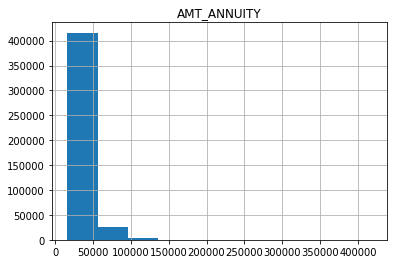

In [110]:
df1.hist(column='AMT_ANNUITY')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

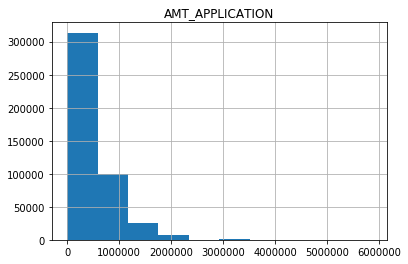

In [113]:
df1.hist(column='AMT_APPLICATION')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

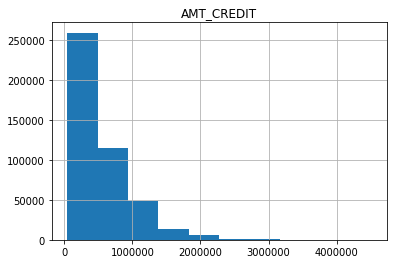

In [114]:
df1.hist(column='AMT_CREDIT')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

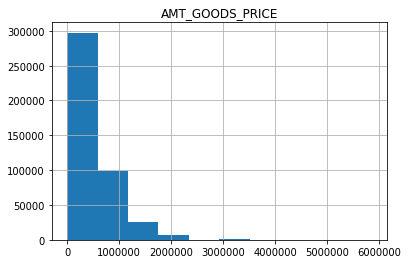

In [115]:
df1.hist(column='AMT_GOODS_PRICE')
plt.show

##### Bi variate Analysis

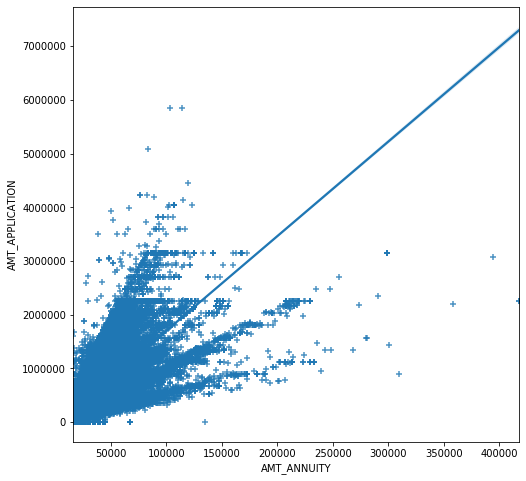

In [85]:
x,y = df1['AMT_ANNUITY'],df1['AMT_APPLICATION']
plt.figure(figsize=(8,8))
sns.regplot(x=x, y=y, marker='+')

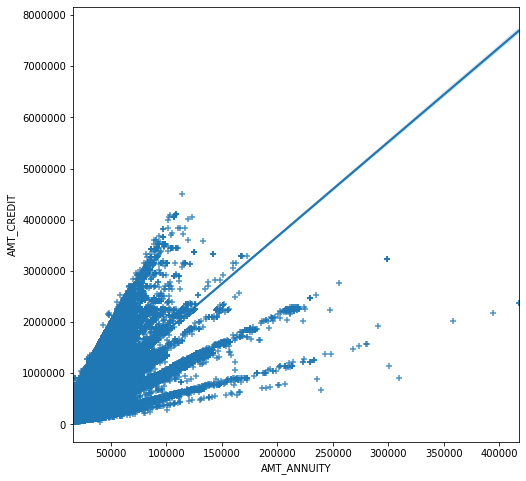

In [88]:
x,y = df1['AMT_ANNUITY'],df1['AMT_CREDIT']
plt.figure(figsize=(8,8))
sns.regplot(x=x, y=y, marker='+')

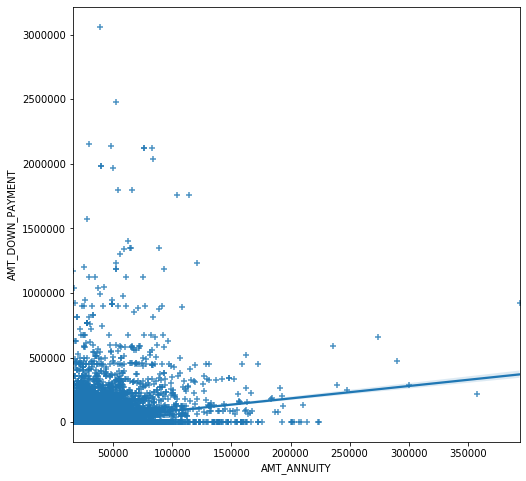

In [89]:
x,y = df1['AMT_ANNUITY'],df1['AMT_DOWN_PAYMENT']
plt.figure(figsize=(8,8))
sns.regplot(x=x, y=y, marker='+')

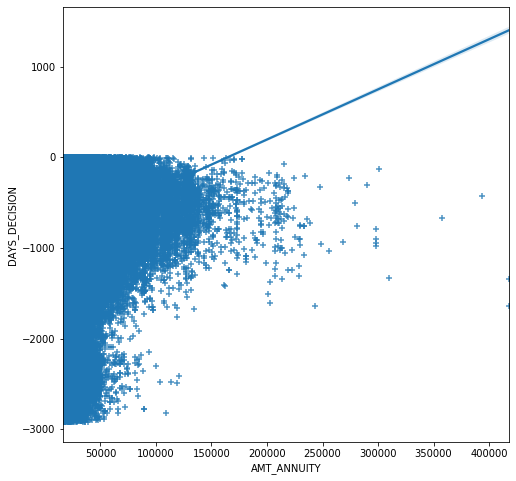

In [117]:
x,y = df1['AMT_ANNUITY'],df1['DAYS_DECISION']
plt.figure(figsize=(8,8))
sns.regplot(x=x, y=y, marker='+')

In [118]:
#checking the pecentage of null values 

print(round(100*(prev_data.isnull().sum()/len(prev_data))))

SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                     22.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT                54.0
AMT_GOODS_PRICE                 23.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT               54.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE                0.0
CODE_REJECT_REASON               0.0
NAME_TYPE_SUITE                 49.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY              0.0
NAME_PORTFOLIO                   0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
NAME_SELLER_INDUSTRY             0.0
C

In [91]:
dropped_prev_data = prev_data.dropna(axis=1)
dropped_prev_data.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,
2030495,271877,Consumer loans,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle
2802425,108129,Cash loans,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action
2523466,122040,Cash loans,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high
2819243,176158,Cash loans,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle
1784265,202054,Cash loans,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1383531,199383,Cash loans,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
2315218,175704,Cash loans,0.0,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA
1656711,296299,Cash loans,0.0,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA
2367563,342292,Cash loans,0.0,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA


In [92]:
print(round(100*(dropped_prev_data.isnull().sum()/len(dropped_prev_data))))

SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
dtype: float64


In [93]:
dropped_prev_data.nunique()

SK_ID_CURR                     338857
NAME_CONTRACT_TYPE                  4
AMT_APPLICATION                 93885
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PROCESS_START            24
FLAG_LAST_APPL_PER_CONTRACT         2
NFLAG_LAST_APPL_IN_DAY              2
NAME_CASH_LOAN_PURPOSE             25
NAME_CONTRACT_STATUS                4
DAYS_DECISION                    2922
NAME_PAYMENT_TYPE                   4
CODE_REJECT_REASON                  9
NAME_CLIENT_TYPE                    4
NAME_GOODS_CATEGORY                28
NAME_PORTFOLIO                      5
NAME_PRODUCT_TYPE                   3
CHANNEL_TYPE                        8
SELLERPLACE_AREA                 2097
NAME_SELLER_INDUSTRY               11
NAME_YIELD_GROUP                    5
dtype: int64

In [94]:
dropped_prev_data.shape

(1670214, 20)

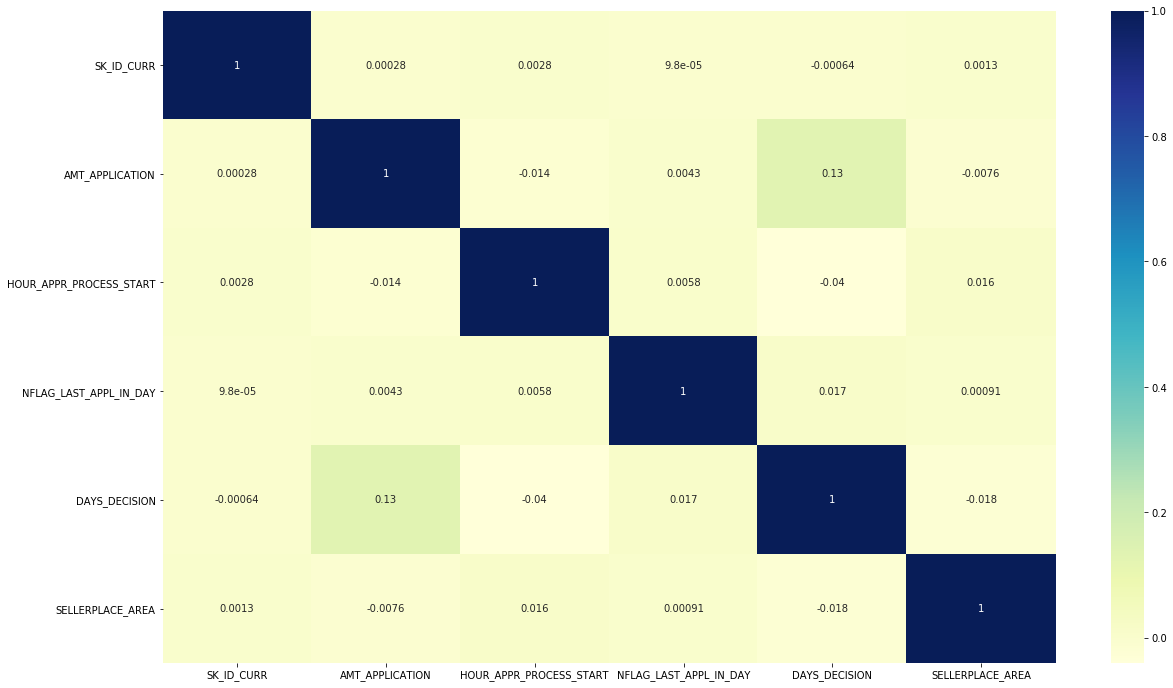

In [95]:
plt.figure(figsize=(20,12))
sns.heatmap(dropped_prev_data.corr(),cmap='YlGnBu',annot=True);

###### Looking at the number of requests recived for each Contract type

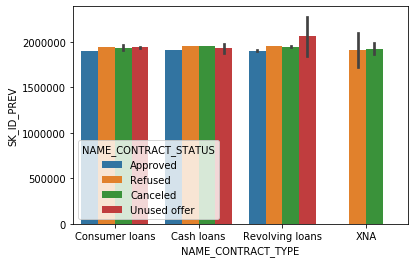

In [96]:
contract_type = sns.barplot(x = 'NAME_CONTRACT_TYPE' , y=dropped_prev_data.index,hue = 'NAME_CONTRACT_STATUS',data = dropped_prev_data)

 for cash Loans, we have a better performance in accepting the loan but on the same time, more number of loans have been cancelled by the user. Whereas if we look at Revolving Loans, we can see that there is a huge variation in the Unused offer section

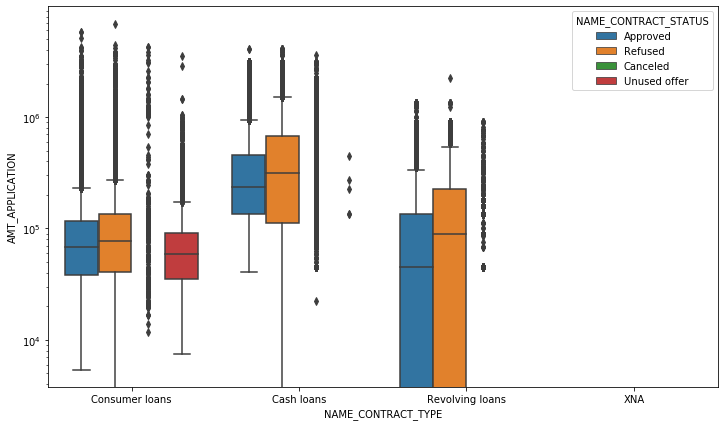

In [97]:
### Finding the outliers NAME_CONTRACT_TYPE' 

plt.figure(figsize=(12,7))
ax = sns.boxplot(x = 'NAME_CONTRACT_TYPE' , y = 'AMT_APPLICATION',hue = 'NAME_CONTRACT_STATUS',data =dropped_prev_data)
ax.set_yscale('log')

Revolving cashloans is having high outliers.

Text(0.5, 1.0, 'Status of the requests for the variating Amount!')

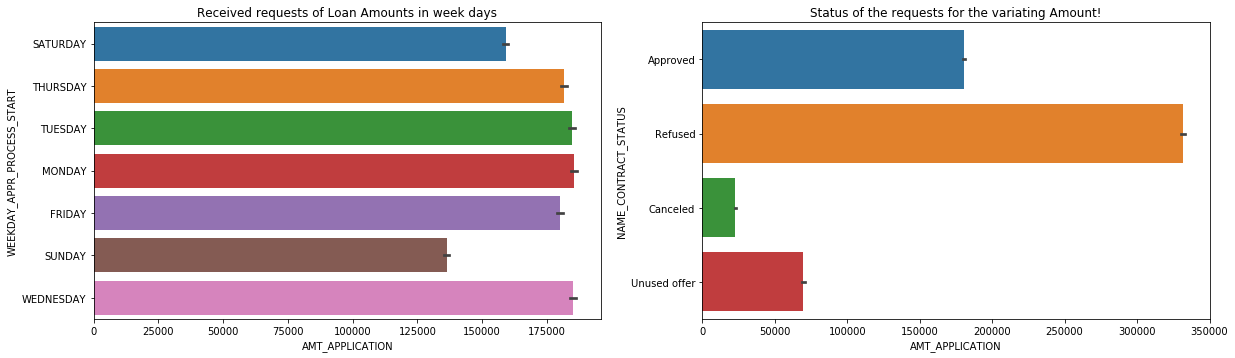

In [109]:
# Next step is to remove the outliers

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plot_amount_weekday = sns.barplot(x = 'AMT_APPLICATION' , y = 'WEEKDAY_APPR_PROCESS_START',data = dropped_prev_data)
plt.title('Received requests of Loan Amounts in week days')

plt.subplot(2,2,2)
plot_amount_status = sns.barplot(x = 'AMT_APPLICATION' , y = 'NAME_CONTRACT_STATUS',data = dropped_prev_data)
plt.title('Status of the requests for the variating Amount')


we can to see that for Large Amount of money, we are getting requests on the First 4 days of the week.

Along with that we can see that the requests between 15 lacs to 25lacs are usually approved whereas requests around 30 lacs are either rejected or cancelled.



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


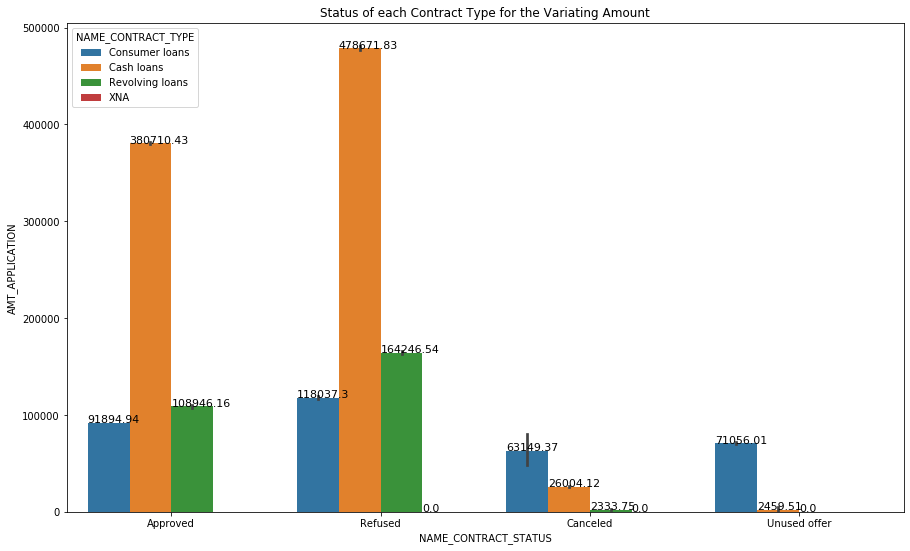

In [119]:
#This graph is focussed on the MEAN VALUES for the Amount
plt.figure(figsize=(15,9))
plot_amount_hue_contract_type = sns.barplot(x = 'NAME_CONTRACT_STATUS', y ='AMT_APPLICATION',hue = 'NAME_CONTRACT_TYPE',data = dropped_prev_data)
plt.title('Status of each Contract Type for the Variating Amount');
for i in plot_amount_hue_contract_type.patches:
    plot_amount_hue_contract_type.text(i.get_x(), i.get_height()+.2,str(round(i.get_height(),2)),fontsize = 11)

Inference:-The highest number of 'NAME_CONTRACT_TYPE' is approved cash loans in total is 380710.43 and consumer loan is 91894.94 and revolving cash loan is 108946.16

In [100]:
#  correlation of important attributes 

corr = ['HOUR_APPR_PROCESS_START','AMT_APPLICATION','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
df_corr= dropped_prev_data.loc[:,corr]
df_corr.head(10)

,HOUR_APPR_PROCESS_START,AMT_APPLICATION,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY
SK_ID_PREV,,,,
2030495,15,17145.0,Y,1
2802425,11,607500.0,Y,1
2523466,11,112500.0,Y,1
2819243,7,450000.0,Y,1
1784265,9,337500.0,Y,1
1383531,8,315000.0,Y,1
2315218,11,0.0,Y,1
1656711,7,0.0,Y,1
2367563,15,0.0,Y,1


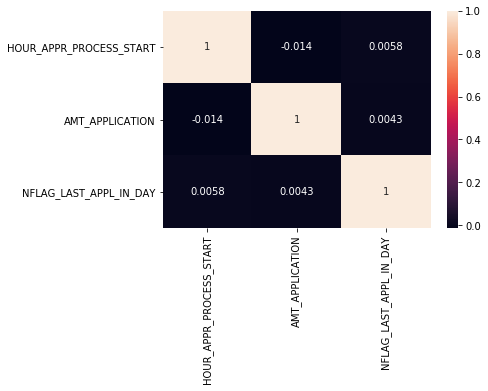

In [101]:
heat_corr = df_corr.corr()
sns.heatmap(heat_corr,annot=True)

Inference:-Each column positively and negatively less correlated

###### Exploring the Portfolio for the client type and checking the amount of application is received.We'll also look for the Cumulative Status for Portfolios based on the Amount of loan requested.And Channel Types from where the client got acquired from the previous application

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

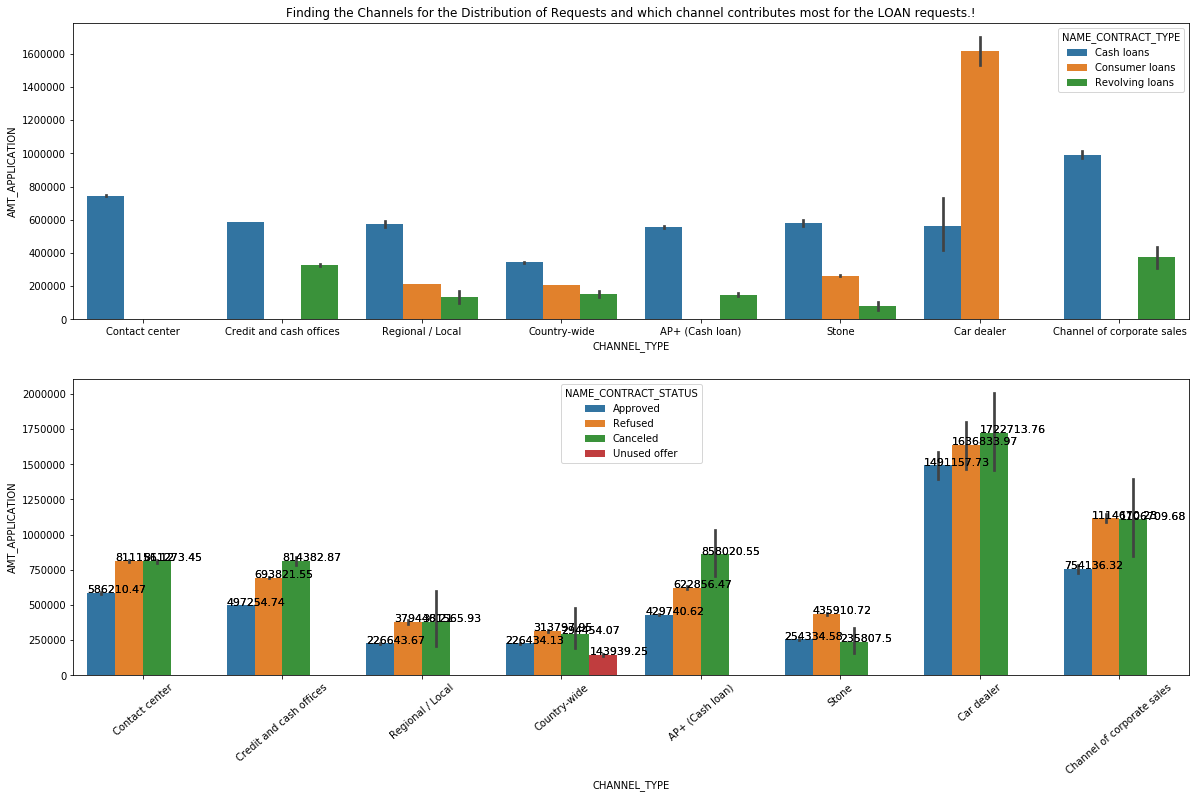

In [102]:
plt.figure(figsize = (20,12))
plt.subplot(2,1,1)
channel_plot = sns.barplot(x = 'CHANNEL_TYPE' , y = 'AMT_APPLICATION' , hue = 'NAME_CONTRACT_TYPE',data = df1)
#plt.xticks(rotation=40);
plt.title('Finding the Channels for the Distribution of Requests and which channel contributes most for the LOAN requests.!');
plt.subplot(2,1,2)
channel_plot_status = sns.barplot(x = 'CHANNEL_TYPE' , y = 'AMT_APPLICATION' , hue = 'NAME_CONTRACT_STATUS',data = df1)
plt.xticks(rotation=40);
l=[]
for i in channel_plot_status.patches:
    channel_plot_status.text(i.get_x(), i.get_height()+.2,str(round(i.get_height(),2)),fontsize = 11)
    l.append(channel_plot_status.text(i.get_x(), i.get_height()+.2,str(round(i.get_height(),2)),fontsize = 11))


Inference:-The highest consumer loans requested from Car dealers and  cash loans from Channel of corporate sales.
     
The Highest approved cash loans for cumulative cases for Car dealer and channel of corporate sales.s.And cumulative cases for refused and canceled for car dealers.

##### Analysis:The highest number of application processing start at 22nd hour.

Large Amount of money, we are getting requests on the First 4 days of the week.

Along with that we can see that the requests between 15 lacs to 25lacs are usually approved whereas requests around 30 lacs are either rejected or cancelled.

The highest number of 'NAME_CONTRACT_TYPE' is approved cash loans in total is 380710.43 and consumer loan is 91894.94 and revolving cash loan is 108946.16
    
The highest consumer loans requested from Car dealers and cash loans from Channel of corporate sales.

The Highest approved cash loans for cumulative cases for Car dealer and channel of corporate sales.s.And cumulative cases for refused and canceled for car dealers.

###### Conclusion:-The highest consumer loans requested from Car dealers and cash loans from Channel of corporate sales.

The Highest approved cash loans for cumulative cases for Car dealer and channel of corporate sales.s.And cumulative cases for refused and canceled for car dealers.

##### END #######################################